In [2]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt

import os
import sys
from pathlib import Path

# Get the current working directory, then resolve its parent's parent (or adjust as needed)
parent_dir = str(Path().resolve().parents[0]) 

# Insert the parent directory at the beginning of sys.path
sys.path.insert(0, parent_dir)

from helper_functions import circuit_builder_1 as cb1

In [3]:
rho_init = cb1.get_Z_basis_states()['RHO_ZERO']  # Initial state |0><0| for qubit initialization
h=cb1.get_all_gates()['H']
x=cb1.get_all_gates()['X']
s=cb1.get_all_gates()['S']
y=cb1.get_all_gates()['Y']
s_dag=cb1.get_all_gates()['S_DAG']
rho_2 = cb1.apply_gate(rho_init, h)

rho_3 = cb1.error_gate(rho_2, [.1,.1,.1])

rho_4 = cb1.apply_gate(rho_3,x)

rho_5= cb1.error_gate(rho_4,[.05,.1,.04])

rho_6 = cb1.apply_gate(rho_5, h)

rho_7 = cb1.error_gate(rho_6,[.1,.03,.1])

rho_8 = cb1.apply_gate(rho_7, s)

rho_9 = cb1.error_gate(rho_8,[.01,.02,.03])

rho_10 = cb1.apply_gate(rho_9, y)

rho_11 = cb1.apply_gate(rho_10, h)

print("After applying Hadamard gate again:")
print(rho_11.full())

print("Going back to the Z-basis:")
rho_12 = cb1.apply_gate(rho_11, h)
rho_13 = cb1.apply_gate(rho_12,y)
rho_14 = cb1.apply_gate(rho_13,s_dag)
rho_14= cb1.apply_gate(rho_14,h)
rho_15 = cb1.apply_gate(rho_14,x)
rho_16 = cb1.apply_gate(rho_15,h)

print("Final state in Z-basis:")
print(rho_16.full().round(3))




After applying Hadamard gate again:
[[ 0.5      +2.34678265e-17j -0.1502496+2.14003052e-17j]
 [-0.1502496-2.14003052e-17j  0.5      -2.34678265e-17j]]
Going back to the Z-basis:
Final state in Z-basis:
[[ 0.65+0.j -0.  +0.j]
 [-0.  -0.j  0.35-0.j]]


In [4]:
r1=cb1.get_Z_basis_states()['RHO_ZERO']
r2 = cb1.generate_entanglement_multi_qubit(r1,0,[0])

print("Entangled state of 1 qubit (should be |0>):")
print(r2.full())

ev=[0,1]
# Apply errors and gates to the entangled state
r3 = cb1.error_gate_tensor(r2, [.1,.1,.1],1, ev)
r4 = cb1.multi_qubit_apply_gate(r3, h, 0, ev)
r5= cb1.error_gate_tensor(r4, [.05,.1,.04],0, ev)

r6 = cb1.multi_qubit_apply_gate(r5, h, 0, ev)
r7 = cb1.error_gate_tensor(r6, [.1,.03,.1],1, ev)
r8 = cb1.multi_qubit_apply_gate(r7, s, 1, ev)
r9 = cb1.error_gate_tensor(r8, [.01,.02,.03],1, ev)
r10 = cb1.multi_qubit_apply_gate(r9, y, 0, ev)
r11 = cb1.multi_qubit_apply_gate(r10, h, 0, ev)


# Going back to the Z-basis for entangled state

r12=cb1.multi_qubit_apply_gate(r11, h, 0, ev)
r13=cb1.multi_qubit_apply_gate(r12, y, 0, ev)
r14=cb1.multi_qubit_apply_gate(r13, s_dag, 1, ev)
r14=cb1.multi_qubit_apply_gate(r13, h, 0, ev)
r15=cb1.multi_qubit_apply_gate(r14, h,0, ev)

print("After applying Hadamard gate again on entangled state:")
print(r11.full())

print("Going back to the Z-basis for entangled state:")
print(r15.full().round(3))

Entangled state of 1 qubit (should be |0>):
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]
After applying Hadamard gate again on entangled state:
[[ 0.35434  +0.j  0.       +0.j -0.2551248+0.j  0.       +0.j]
 [ 0.       +0.j  0.14566  +0.j  0.       +0.j -0.1048752+0.j]
 [-0.2551248+0.j  0.       +0.j  0.35434  +0.j  0.       +0.j]
 [ 0.       +0.j -0.1048752+0.j  0.       +0.j  0.14566  +0.j]]
Going back to the Z-basis for entangled state:
[[ 0.609+0.j  0.   +0.j  0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.251+0.j  0.   +0.j -0.   +0.j]
 [-0.   +0.j  0.   +0.j  0.099+0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.041+0.j]]


### Testing QFIM Calculation

In [5]:
print(np.zeros((9,9)))

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]


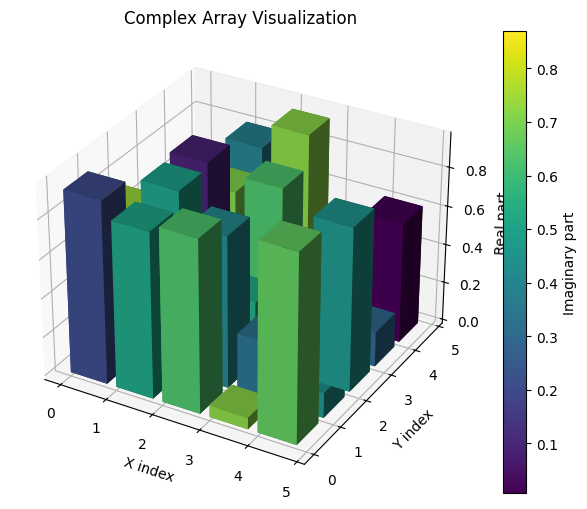

In [6]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_complex_array(arr):
    """
    Plots a complex NumPy square array in 3D.
    - X and Y: array indices
    - Z: real part of the complex number
    - Color: imaginary part of the complex number
    """
    if arr.ndim != 2 or arr.shape[0] != arr.shape[1]:
        raise ValueError("Input must be a square 2D NumPy array.")

    n = arr.shape[0]
    x, y = np.meshgrid(range(n), range(n))
    z = arr.real
    colors = arr.imag

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Normalize colors for colormap
    norm = plt.Normalize(colors.min(), colors.max())
    cmap = plt.cm.viridis

    ax.bar3d(x.flatten(), y.flatten(), np.zeros_like(z.flatten()),
             dx=0.8, dy=0.8, dz=z.flatten(),
             color=cmap(norm(colors.flatten())), shade=True)

    ax.set_xlabel('X index')
    ax.set_ylabel('Y index')
    ax.set_zlabel('Real part')
    ax.set_title('Complex Array Visualization')

    # Add colorbar for imaginary part
    mappable = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
    mappable.set_array(colors)
    fig.colorbar(mappable, ax=ax, label='Imaginary part')

    plt.show()

# Example usage:
arr = np.random.rand(5, 5) + 1j * np.random.rand(5, 5)
plot_complex_array(arr)


In [10]:
import numpy as np
def generate_squares(n):
    for _ in range(n):
        yield np.random.rand(3, 3) ** 2

squares= generate_squares(5)

print(type(squares))
print(squares)

for s in list(squares):
    print(s)

<class 'generator'>
<generator object generate_squares at 0x10573d9e0>
[[7.69804653e-06 3.24451648e-01 5.89795867e-01]
 [5.25458436e-01 1.74077193e-01 1.42184668e-01]
 [3.31972540e-04 2.20670531e-02 5.08901900e-01]]
[[1.89781507e-01 7.15736903e-01 8.93304916e-01]
 [1.07115113e-01 1.63001486e-01 3.34097893e-01]
 [3.02507619e-02 2.30823972e-01 4.24021619e-05]]
[[0.69179254 0.25465856 0.05470277]
 [0.00145145 0.86229644 0.46723411]
 [0.9053816  0.07841233 0.40780359]]
[[0.00139696 0.03838854 0.03923612]
 [0.84758887 0.46683862 0.0137781 ]
 [0.50888553 0.60611336 0.62000607]]
[[0.16275305 0.71264177 0.88010443]
 [0.34199432 0.19836121 0.14722361]
 [0.66988644 0.23582139 0.75396726]]
